### Create first model

In [96]:
#import library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

In [38]:
os.chdir('C:\\Github\\Python\\Kaggle\\Titanic\\Dataset')

In [39]:
#list files in folder
os.listdir()

['features.csv',
 'gender_submission.csv',
 'target.csv',
 'test.csv',
 'train.csv']

In [43]:
#load dataset
features = pd.read_csv('features.csv')
target = pd.read_csv('target.csv')

In [44]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [45]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [46]:
# Convert ‘Sex’ feature into numeric.
gender = {"Sex" : {'male': 1, 'female': 0}}
features.replace(gender, inplace = True)

In [47]:
features['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [48]:
#Split data
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=0)

In [84]:
#checks shape split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 6), (268, 6), (623, 1), (268, 1))

In [62]:
#np.ravel is used to tranform matrix into array
model_lr = LogisticRegression()
model_lr.fit(X_train,np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
prediction_lr = model_lr.predict(X_test)
prediction_lr

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [87]:
prediction_lr.shape

(268,)

In [88]:
#confusion matrix
cf_lr = confusion_matrix(y_test,prediction_lr)
cf_lr

array([[142,  26],
       [ 27,  73]], dtype=int64)

In [93]:
#Accucary model
accuracy_lr = accuracy_score(y_test,prediction_lr)
print(accuracy_lr)

0.8022388059701493


In [92]:
#Metrics report
metrics_lr = classification_report(y_test,prediction_lr)
print(metrics_lr)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.74      0.73      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [100]:
#ROC curve
lr_tpr, lr_fpr, threshold = roc_curve(y_test, prediction_lr)
lr_auc = auc(lr_tpr, lr_fpr)

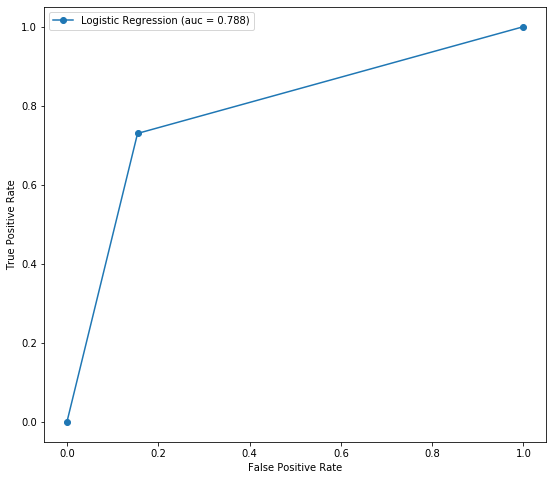

In [103]:
#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 8))
plt.plot(lr_tpr, lr_fpr, marker='o', label='Logistic Regression (auc = %0.3f)' % lr_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()